# Structural analysis of Mpro monomer active site scprit

## Objective:

In this notebook I will be preforming a structural analysis of the active site of the Mpro monomer to determine if one the active site is falling apart and two the time frame of this process. I will be meassuring the distances between key features in the active site and dihedral angles over the time of our trajectories.

## measuring the distance between the center of mass of PHE140 and HIS163 ring:

In [3]:
# Reading in the Mpro Trajectory and importing in programs I will be using 
import mdtraj as md
import itertools
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

#listing all xtc files in my Downloads directory
!pwd
!ls | grep xtc

/Users/rashadreid/Downloads
all.xtc
all_cluster.xtc
fix_xtc_periodic
traj_comp.xtc
xtc.gro
xtc_cluster.gro


In [5]:
# loading trajectory into mdtraj 
## loading traj and top file for RUN983 CLONE0 into mdtraj
traj_983 = md.load('all_cluster.xtc',top = 'xtc_cluster.gro') # traj_983 is the traj for run983 clone0
print(traj_983)

<mdtraj.Trajectory with 1507 frames, 4702 atoms, 307 residues, and unitcells>


In [6]:
# loading gro file into mdtraj as gro
gro = md.load('xtc.gro')

In [7]:
# Measuring the distance between the center of the PHE140 and HIS163 ring 
## creating an indices of the phyenlalanine and histidine in the Mpro monomer 
PHE_indices = list(set([a.residue.index for a in traj_983.topology.atoms if a.residue.name == 'PHE']))
HIS_indices = list(set([a.residue.index for a in traj_983.topology.atoms if a.residue.name == 'HIS']))

# printing PHE indices
print(PHE_indices)


[160, 224, 67, 4, 292, 135, 104, 9, 231, 295, 141, 113, 182, 151, 186, 220]


In [8]:
# printing HIS indices
print(HIS_indices)

[65, 164, 165, 42, 173, 81, 247]


In [9]:
# Selecting PHE140 and HIS163 from the index
## PHE140 = residue 141
## HIS63 = residue 164
PHE140 = traj_983.topology.select('residue 141')
HIS163 = traj_983.topology.select('residue 164')


In [10]:
# creating an index of the atoms in residue 140 and residue 163 and then selecting the atoms in their rings 
## all the atoms in the residue 140 ring 
PHE140_indices = [a.index for a in traj_983.topology.atoms if a.residue.index in [141] and a.name in ['CG','CD1','CD2','CE1','CE2','CZ']]
print(PHE140_indices)

## all the atoms in the residue 163 ring
HIS163_indices = [a.index for a in traj_983.topology.atoms if a.residue.index in [164]and a.name in ['CG','ND1','CD2','CE1','NE2']]
print(HIS163_indices)

[2218, 2219, 2220, 2221, 2222, 2223]
[2546, 2547, 2548, 2549, 2550]


In [11]:
# creating a trajectory with only PHE140 ring atoms sliced out
traj_PHE140_indices = traj_983.atom_slice(PHE140_indices)
print('traj_PHE140_indices', traj_PHE140_indices)

# creating a trajectory with only HIS163 ring atoms sliced out
traj_HIS163_indices = traj_983.atom_slice(HIS163_indices)
print('traj_HIS163_indices', traj_HIS163_indices)

traj_PHE140_indices <mdtraj.Trajectory with 1507 frames, 6 atoms, 1 residues, and unitcells>
traj_HIS163_indices <mdtraj.Trajectory with 1507 frames, 5 atoms, 1 residues, and unitcells>


In [12]:
# from the new trajectories get the Coordinates of the center of mass of the phenylalanine and histidine ring over time
## coordinates of the center of mass of PHE140
coords_PHE140_com = md.compute_center_of_mass(traj_PHE140_indices)
print('coords_PHE140_com.shape', coords_PHE140_com.shape)

## coordinates of the center of mass of HIS163
coords_HIS163_com = md.compute_center_of_mass(traj_HIS163_indices)
print('coords_HIS163_com.shape', coords_HIS163_com.shape)

coords_PHE140_com.shape (1507, 3)
coords_HIS163_com.shape (1507, 3)


In [13]:
# copying the two com atom coords to atom indicies 0 and 1
## creating hacked_traj
hacked_traj = traj_983

## creating hacked traj 0 and 1
hacked_traj.xyz[:,0,:] = coords_PHE140_com # PHE140 trajectory
hacked_traj.xyz[:,1,:] = coords_HIS163_com # HIS163 trajectory


## computing the distance between the center of mass of the PHE140 and HIS163 ring
PHE140_HIS163_distances = md.compute_distances(hacked_traj, [[0,1]])[:,0]
print('PHE140_HIS163_distances', PHE140_HIS163_distances)


PHE140_HIS163_distances [0.3764744  0.42853603 0.44911954 ... 0.62505716 0.49976146 0.5637519 ]


In [14]:
hacked_traj.unitcell_vectors

array([[[8.28675, 0.     , 0.     ],
        [0.     , 8.28675, 0.     ],
        [0.     , 0.     , 8.28675]],

       [[8.28675, 0.     , 0.     ],
        [0.     , 8.28675, 0.     ],
        [0.     , 0.     , 8.28675]],

       [[8.28675, 0.     , 0.     ],
        [0.     , 8.28675, 0.     ],
        [0.     , 0.     , 8.28675]],

       ...,

       [[8.28675, 0.     , 0.     ],
        [0.     , 8.28675, 0.     ],
        [0.     , 0.     , 8.28675]],

       [[8.28675, 0.     , 0.     ],
        [0.     , 8.28675, 0.     ],
        [0.     , 0.     , 8.28675]],

       [[8.28675, 0.     , 0.     ],
        [0.     , 8.28675, 0.     ],
        [0.     , 0.     , 8.28675]]], dtype=float32)

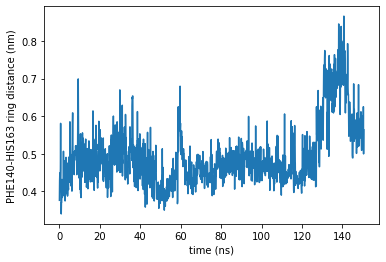

In [15]:
plt.figure()
time_in_ns = 0.100*np.arange(PHE140_HIS163_distances.shape[0]) 
plt.plot(time_in_ns, PHE140_HIS163_distances)
plt.xlabel('time (ns)')
plt.ylabel('PHE140-HIS163 ring distance (nm)')
plt.show()


mybins [0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43
 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57
 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71
 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85
 0.86 0.87 0.88 0.89 0.9 ]
bin_centers [0.305 0.315 0.325 0.335 0.345 0.355 0.365 0.375 0.385 0.395 0.405 0.415
 0.425 0.435 0.445 0.455 0.465 0.475 0.485 0.495 0.505 0.515 0.525 0.535
 0.545 0.555 0.565 0.575 0.585 0.595 0.605 0.615 0.625 0.635 0.645 0.655
 0.665 0.675 0.685 0.695 0.705 0.715 0.725 0.735 0.745 0.755 0.765 0.775
 0.785 0.795 0.805 0.815 0.825 0.835 0.845 0.855 0.865 0.875 0.885 0.895]


Text(0, 0.5, 'counts')

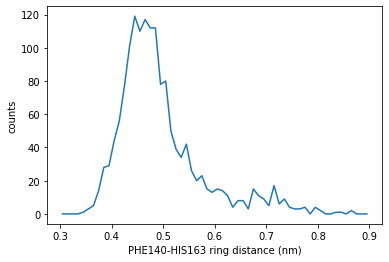

In [16]:
plt.figure()
bin_width = 0.01
mybins = np.arange(0.3, 0.9, bin_width)
print('mybins', mybins)
counts, bin_edges = np.histogram(PHE140_HIS163_distances, bins=mybins)
bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2.0
print('bin_centers', bin_centers)
plt.plot(bin_centers, counts)
plt.xlabel('PHE140-HIS163 ring distance (nm)')
plt.ylabel('counts')
#plt.show()
## this graph looks similar to the one Dr.Voelz made 

In [17]:
#consider using these files the periodic box should be fixed 

# Load an Mpro trajectory in as an mdgtraj Trajectory() object

#grofile = '../data/setup/xtc_cluster.gro'
#xtcfile = '../data/RUN983/CLONE0/all_cluster.xtc'
#t = md.load_xtc(xtcfile, top=grofile)

# Worked 

## Measuring the distance between the Cys145-S and the HIS163 ring center of mass:




In [18]:
# Measuring the distance between Cys145 and His163
## creating an indicies of the cysteine residues in Mpro
CYS_indices = list(set([a.residue.index for a in traj_983.topology.atoms if a.residue.name == 'CYS']))

# print CYS indices
print(CYS_indices)


[129, 161, 39, 266, 45, 301, 17, 146, 86, 23, 118, 157]


In [19]:
# Selecting CYS145 and HIS163 from the index
## CYS145 = residue 146
## HIS63 = residue 164
CYS145 = traj_983.topology.select('residue 146')
HIS163 = traj_983.topology.select('residue 164')


In [20]:
# creating an index of the atoms in residue 145 and then selecting the sulfer atoms 
## all the sulfer atoms in the residue 145 
CYS145_indices = [a.index for a in traj_983.topology.atoms if a.residue.index in [146] and a.name in ['SG']]

#print CYS145 indices
print(CYS145_indices)

[2289]


In [21]:
# creating a trajectory with only CYS145 SG atom sliced out
traj_CYS145_indices = traj_983.atom_slice(CYS145_indices)
print('traj_CYS145_indices', traj_CYS145_indices)

# creating a trajectory with only HIS163 ring atoms sliced out
#traj_HIS163_indicies = traj_983.atom_slice(HIS163_indicies)
#print('traj_HIS163_indicies', traj_HIS163_indicies)

traj_CYS145_indices <mdtraj.Trajectory with 1507 frames, 1 atoms, 1 residues, and unitcells>


In [22]:
traj_CYS145_indices.xyz.shape


(1507, 1, 3)

## Start of test:

In [23]:
test1 = md.compute_center_of_mass(traj_CYS145_indices)

print('test1.shape',test1.shape)

test1.shape (1507, 3)


In [24]:
# copying CYS145-SG atom coords to atom indices 2
## creating hacked traj 2
hacked_traj.xyz[:,2,:] = test1 # CYS145-SG trajectory

## computing the distance between the center of mass of the HIS163 ring and CYS145-SG
CYS145_HIS163_distances = md.compute_distances(hacked_traj, [[1,2]])[:,0]
print('CYS145_HIS163_distances', CYS145_HIS163_distances)

CYS145_HIS163_distances [0.5412658  0.34651896 0.37343612 ... 0.61965424 0.64443934 0.6520509 ]


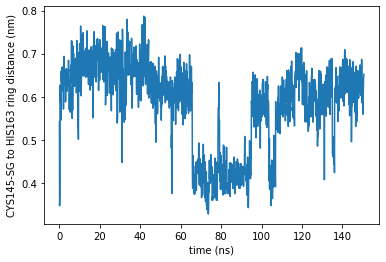

In [25]:
plt.figure()
time_in_ns = 0.100*np.arange(CYS145_HIS163_distances.shape[0]) 
plt.plot(time_in_ns, CYS145_HIS163_distances)
plt.xlabel('time (ns)')
plt.ylabel('CYS145-SG to HIS163 ring distance (nm)')
plt.show()

mybins [0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43
 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57
 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71
 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85
 0.86 0.87 0.88 0.89 0.9 ]
bin_centers [0.305 0.315 0.325 0.335 0.345 0.355 0.365 0.375 0.385 0.395 0.405 0.415
 0.425 0.435 0.445 0.455 0.465 0.475 0.485 0.495 0.505 0.515 0.525 0.535
 0.545 0.555 0.565 0.575 0.585 0.595 0.605 0.615 0.625 0.635 0.645 0.655
 0.665 0.675 0.685 0.695 0.705 0.715 0.725 0.735 0.745 0.755 0.765 0.775
 0.785 0.795 0.805 0.815 0.825 0.835 0.845 0.855 0.865 0.875 0.885 0.895]


Text(0, 0.5, 'counts')

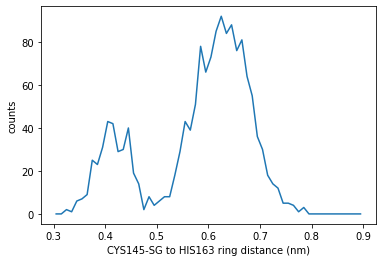

In [26]:
plt.figure()
bin_width = 0.01
mybins = np.arange(0.3, 0.9, bin_width)
print('mybins', mybins)
counts, bin_edges = np.histogram(CYS145_HIS163_distances, bins=mybins)
bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2.0
print('bin_centers', bin_centers)
plt.plot(bin_centers, counts)
plt.xlabel('CYS145-SG to HIS163 ring distance (nm)')
plt.ylabel('counts')

## End of test:

In [27]:
# copying CYS145-SG atom coords to atom indices 2
## creating hacked traj 2
hacked_traj.xyz[:,2,:] = traj_CYS145_indices # CYS145-SG trajectory

## computing the distance between the center of mass of the HIS163 ring and CYS145-SG
#CYS145_HIS163_distances = md.compute_distances(hacked_traj, [[1,2]])[:,0]
#print('CYS145_HIS163_distances', CYS145_HIS163_distances)


ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 2.

## Measuring the distance between the Cys145-S and the HIS41 ring center of mass:


In [28]:
# Measuring the distance between the center of the HIS41 ring and CYS145-SG 
## creating an indices of the histidine in the Mpro monomer 
HIS_indices = list(set([a.residue.index for a in traj_983.topology.atoms if a.residue.name == 'HIS']))

# printing PHE indices
print(HIS_indices)


[65, 164, 165, 42, 173, 81, 247]


In [29]:
# Selecting HIS41 from the index
## HIS41 = residue 42
HIS41 = traj_983.topology.select('residue 42')

In [30]:
# creating an index of the atoms in residue 42 imidazole ring
## all the atoms in the residue 42 ring
HIS41_indices = [a.index for a in traj_983.topology.atoms if a.residue.index in [42]and a.name in ['CG','ND1','CD2','CE1','NE2']]
print(HIS41_indices)

[657, 658, 659, 660, 661]


In [31]:
# creating a trajectory with only HIS41 ring atoms sliced out
traj_HIS41_indices = traj_983.atom_slice(HIS41_indices)
print('traj_HIS41_indices', traj_HIS41_indices)

traj_HIS41_indices <mdtraj.Trajectory with 1507 frames, 5 atoms, 1 residues, and unitcells>


In [32]:
# from the new trajectories get the Coordinates of the center of mass of the histidine ring over time
## coordinates of the center of mass of HIS41
coords_HIS41_com = md.compute_center_of_mass(traj_HIS41_indices)
print('coords_HIS41_com.shape', coords_HIS41_com.shape)

coords_HIS41_com.shape (1507, 3)


In [33]:
## creating hacked_traj
hacked_traj = traj_983

## creating hacked traj 3
hacked_traj.xyz[:,3,:] = coords_HIS41_com # HIS41 trajectory


## computing the distance between the center of mass of the HIS41 ring and CYS145-SG
CYS145_HIS41_distances = md.compute_distances(hacked_traj, [[2,3]])[:,0]
print('CYS145_HIS41_distances', CYS145_HIS41_distances)


CYS145_HIS41_distances [0.48276722 0.59579605 0.6320087  ... 0.478704   0.5384574  0.47414526]


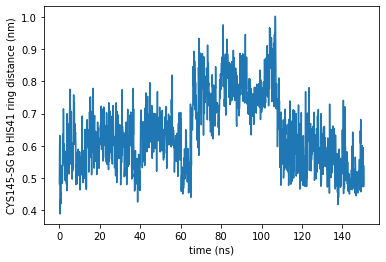

In [146]:
plt.figure()
time_in_ns = 0.100*np.arange(CYS145_HIS41_distances.shape[0]) 
plt.plot(time_in_ns, CYS145_HIS41_distances)
plt.xlabel('time (ns)')
plt.ylabel('CYS145-SG to HIS41 ring distance (nm)')
plt.show()

mybins [0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43
 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57
 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71
 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85
 0.86 0.87 0.88 0.89 0.9 ]
bin_centers [0.305 0.315 0.325 0.335 0.345 0.355 0.365 0.375 0.385 0.395 0.405 0.415
 0.425 0.435 0.445 0.455 0.465 0.475 0.485 0.495 0.505 0.515 0.525 0.535
 0.545 0.555 0.565 0.575 0.585 0.595 0.605 0.615 0.625 0.635 0.645 0.655
 0.665 0.675 0.685 0.695 0.705 0.715 0.725 0.735 0.745 0.755 0.765 0.775
 0.785 0.795 0.805 0.815 0.825 0.835 0.845 0.855 0.865 0.875 0.885 0.895]


Text(0, 0.5, 'counts')

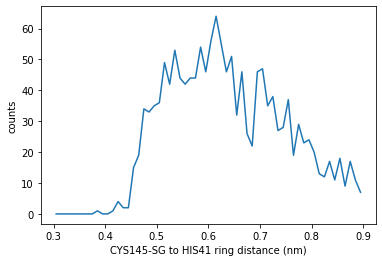

In [35]:
plt.figure()
bin_width = 0.01
mybins = np.arange(0.3, 0.9, bin_width)
print('mybins', mybins)
counts, bin_edges = np.histogram(CYS145_HIS41_distances, bins=mybins)
bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2.0
print('bin_centers', bin_centers)
plt.plot(bin_centers, counts)
plt.xlabel('CYS145-SG to HIS41 ring distance (nm)')
plt.ylabel('counts')

## Measuring the distance between HIS163 ring center of mass  and GLU166-CD:

In [36]:
# Measuring the distance between the center of the HIS163 ring and GLU166-CD 
## creating an indices of the glutamic acid in the Mpro monomer 
GLU_indices = list(set([a.residue.index for a in traj_983.topology.atoms if a.residue.name == 'GLU']))

# printing GLU indices
print(GLU_indices)


[289, 291, 167, 15, 48, 241, 271, 179, 56]


In [37]:
# Selecting GLU166 from the index
## GLU166 = residue 167
GLU166 = traj_983.topology.select('residue 167')

In [38]:
# selecting the CD in residue 167
GLU166_indices = [a.index for a in traj_983.topology.atoms if a.residue.index in [167]and a.name in ['CD']]
print(GLU166_indices)

[2599]


In [39]:
# creating a trajectory with only GLU166-CD atom sliced out
traj_GLU166_indices = traj_983.atom_slice(GLU166_indices)
print('traj_GLU166_indices', traj_GLU166_indices)

traj_GLU166_indices <mdtraj.Trajectory with 1507 frames, 1 atoms, 1 residues, and unitcells>


In [40]:
# from the new trajectories get the Coordinates of the center of mass of the GLU166-CD
## coordinates of the center of mass of GLU166
coords_GLU166_com = md.compute_center_of_mass(traj_GLU166_indices)
print('coords_GLU166_com.shape', coords_GLU166_com.shape)

coords_GLU166_com.shape (1507, 3)


In [41]:
## creating hacked traj 4
hacked_traj.xyz[:,4,:] = coords_GLU166_com # GLU166-CD trajectory

## computing the distance between the center of mass of the HIS163 ring and GLU166-CD
GLU166_HIS163_distances = md.compute_distances(hacked_traj, [[1,4]])[:,0]
print('GLU166_HIS163_distances', GLU166_HIS163_distances)

GLU166_HIS163_distances [0.7047006  0.75539035 0.55916786 ... 0.47482136 0.49468595 0.4788853 ]


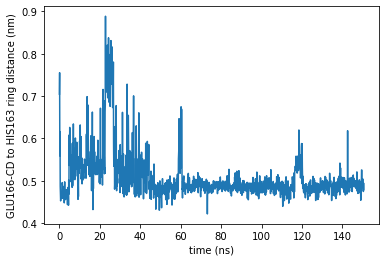

In [42]:
plt.figure()
time_in_ns = 0.100*np.arange(GLU166_HIS163_distances.shape[0]) 
plt.plot(time_in_ns, GLU166_HIS163_distances)
plt.xlabel('time (ns)')
plt.ylabel('GLU166-CD to HIS163 ring distance (nm)')
plt.show()

mybins [0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43
 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57
 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71
 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85
 0.86 0.87 0.88 0.89 0.9 ]
bin_centers [0.305 0.315 0.325 0.335 0.345 0.355 0.365 0.375 0.385 0.395 0.405 0.415
 0.425 0.435 0.445 0.455 0.465 0.475 0.485 0.495 0.505 0.515 0.525 0.535
 0.545 0.555 0.565 0.575 0.585 0.595 0.605 0.615 0.625 0.635 0.645 0.655
 0.665 0.675 0.685 0.695 0.705 0.715 0.725 0.735 0.745 0.755 0.765 0.775
 0.785 0.795 0.805 0.815 0.825 0.835 0.845 0.855 0.865 0.875 0.885 0.895]


Text(0, 0.5, 'counts')

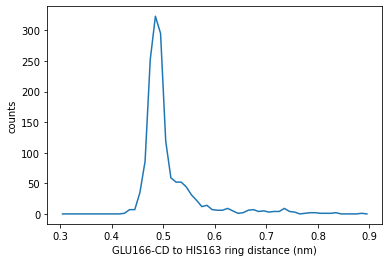

In [43]:
plt.figure()
bin_width = 0.01
mybins = np.arange(0.3, 0.9, bin_width)
print('mybins', mybins)
counts, bin_edges = np.histogram(GLU166_HIS163_distances, bins=mybins)
bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2.0
print('bin_centers', bin_centers)
plt.plot(bin_centers, counts)
plt.xlabel('GLU166-CD to HIS163 ring distance (nm)')
plt.ylabel('counts')

## Measuring the distance between the center of mass of the TYR126 and PHE140 ring: 

In [44]:
# Measuring the distance between the center of the TYR126 ring and PHE140 
## creating an indices of the tyrosine in the Mpro monomer 
TYR_indices = list(set([a.residue.index for a in traj_983.topology.atoms if a.residue.name == 'TYR']))

# printing TYR indices
print(TYR_indices)


[162, 102, 38, 238, 240, 210, 55, 119, 183, 155, 127]


In [45]:
# Selecting TYR126 from the index
## TYR126 = residue 127
TYR126 = traj_983.topology.select('residue 127')

In [46]:
# selecting all the atoms in the TYR126 ring 
TYR126_indices = [a.index for a in traj_983.topology.atoms if a.residue.index in [127]and a.name in ['CG','CZ','CE1','CE2','CD1','CD2']]
print(TYR126_indices)

[1997, 1998, 1999, 2000, 2001, 2002]


In [47]:
# creating a trajectory with only the TYR126 ring atoms sliced out
traj_TYR126_indices = traj_983.atom_slice(TYR126_indices)
print('traj_TYR126_indices', traj_TYR126_indices)

traj_TYR126_indices <mdtraj.Trajectory with 1507 frames, 6 atoms, 1 residues, and unitcells>


In [48]:
# from the new trajectories get the Coordinates of the center of mass of the TYR126 ring
## coordinates of the center of mass of TYR126 ring
coords_TYR126_com = md.compute_center_of_mass(traj_TYR126_indices)
print('coords_TYR126_com.shape', coords_TYR126_com.shape)

coords_TYR126_com.shape (1507, 3)


In [49]:
## creating hacked traj 5
hacked_traj.xyz[:,5,:] = coords_TYR126_com # TYR126 ring trajectory

## computing the distance between the center of mass of the TYR126 ring and PHE140 RING
TYR126_PHE140_distances = md.compute_distances(hacked_traj, [[0,5]])[:,0]
print('TYR126_PHE140_distances', TYR126_PHE140_distances)

TYR126_PHE140_distances [0.629942   0.6298718  0.58950853 ... 0.6073117  0.6330016  0.5806258 ]


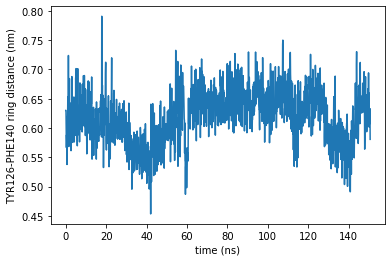

In [50]:
plt.figure()
time_in_ns = 0.100*np.arange(TYR126_PHE140_distances.shape[0]) 
plt.plot(time_in_ns, TYR126_PHE140_distances)
plt.xlabel('time (ns)')
plt.ylabel('TYR126-PHE140 ring distance (nm)')
plt.show()

mybins [0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43
 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57
 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71
 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85
 0.86 0.87 0.88 0.89 0.9 ]
bin_centers [0.305 0.315 0.325 0.335 0.345 0.355 0.365 0.375 0.385 0.395 0.405 0.415
 0.425 0.435 0.445 0.455 0.465 0.475 0.485 0.495 0.505 0.515 0.525 0.535
 0.545 0.555 0.565 0.575 0.585 0.595 0.605 0.615 0.625 0.635 0.645 0.655
 0.665 0.675 0.685 0.695 0.705 0.715 0.725 0.735 0.745 0.755 0.765 0.775
 0.785 0.795 0.805 0.815 0.825 0.835 0.845 0.855 0.865 0.875 0.885 0.895]


Text(0, 0.5, 'counts')

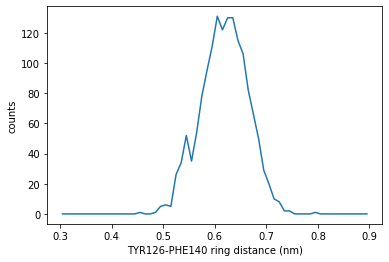

In [51]:
plt.figure()
bin_width = 0.01
mybins = np.arange(0.3, 0.9, bin_width)
print('mybins', mybins)
counts, bin_edges = np.histogram(TYR126_PHE140_distances, bins=mybins)
bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2.0
print('bin_centers', bin_centers)
plt.plot(bin_centers, counts)
plt.xlabel('TYR126-PHE140 ring distance (nm)')
plt.ylabel('counts')

## All possible combinations of 2D histograms of distances:

Text(0, 0.5, 'PHE140-HIS163 ring distance (nm)')

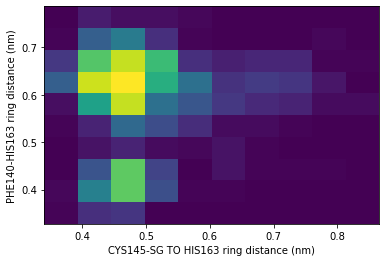

In [52]:
plt.hist2d(PHE140_HIS163_distances,CYS145_HIS163_distances)
plt.xlabel('CYS145-SG TO HIS163 ring distance (nm)')
plt.ylabel('PHE140-HIS163 ring distance (nm)')

Text(27.0, 0.5, 'CYS145-SG to HIS163 ring distance (nm)')

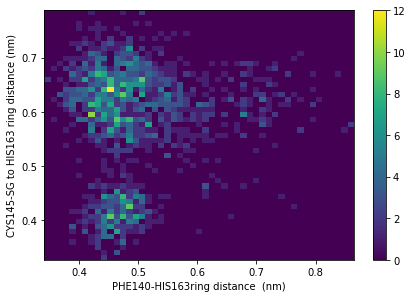

In [53]:
x = PHE140_HIS163_distances
y = CYS145_HIS163_distances


# Creating bins
x_min = np.min(x)
x_max = np.max(x)
  
y_min = np.min(y)
y_max = np.max(y)
  
x_bins = np.linspace(x_min, x_max)
y_bins = np.linspace(y_min, y_max)
  

# Creating plot
plt.hist2d(PHE140_HIS163_distances,CYS145_HIS163_distances, bins = [x_bins, y_bins])

#show plot
plt.tight_layout() 
plt.colorbar()
plt.xlabel('PHE140-HIS163ring distance  (nm)')
plt.ylabel('CYS145-SG to HIS163 ring distance (nm)')
#plot.show()

Text(27.0, 0.5, 'CYS145-SG to HIS41 ring distance (nm)')

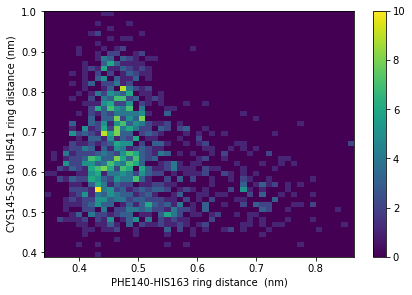

In [54]:
x = PHE140_HIS163_distances
y = CYS145_HIS41_distances


# Creating bins
x_min = np.min(x)
x_max = np.max(x)
  
y_min = np.min(y)
y_max = np.max(y)
  
x_bins = np.linspace(x_min, x_max)
y_bins = np.linspace(y_min, y_max)
  

# Creating plot
plt.hist2d(PHE140_HIS163_distances,CYS145_HIS41_distances, bins = [x_bins, y_bins])

#show plot
plt.tight_layout() 
plt.colorbar()
plt.xlabel('PHE140-HIS163 ring distance  (nm)')
plt.ylabel('CYS145-SG to HIS41 ring distance (nm)')

Text(27.0, 0.5, 'GLU166-HIS163 ring distance (nm)')

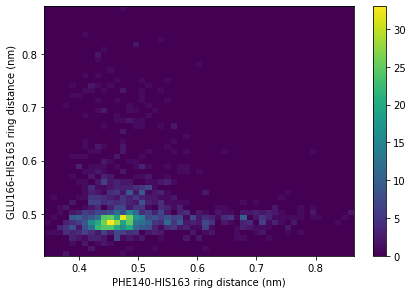

In [55]:
x = PHE140_HIS163_distances
y = GLU166_HIS163_distances


# Creating bins
x_min = np.min(x)
x_max = np.max(x)
  
y_min = np.min(y)
y_max = np.max(y)
  
x_bins = np.linspace(x_min, x_max)
y_bins = np.linspace(y_min, y_max)
  

# Creating plot
plt.hist2d(PHE140_HIS163_distances,GLU166_HIS163_distances, bins = [x_bins, y_bins])

#show plot
plt.tight_layout() 
plt.colorbar()
plt.xlabel('PHE140-HIS163 ring distance (nm)')
plt.ylabel('GLU166-HIS163 ring distance (nm)')

Text(20.625, 0.5, 'TYR126-PHE140 ring distance (nm)')

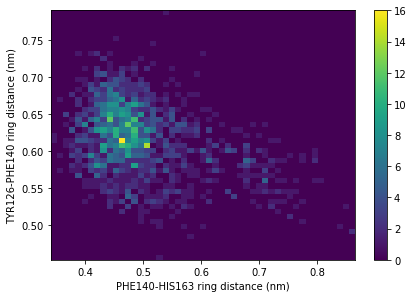

In [56]:
x = PHE140_HIS163_distances
y = TYR126_PHE140_distances


# Creating bins
x_min = np.min(x)
x_max = np.max(x)
  
y_min = np.min(y)
y_max = np.max(y)
  
x_bins = np.linspace(x_min, x_max)
y_bins = np.linspace(y_min, y_max)
  

# Creating plot
plt.hist2d(PHE140_HIS163_distances,TYR126_PHE140_distances, bins = [x_bins, y_bins])

#show plot
plt.tight_layout() 
plt.colorbar()
plt.xlabel('PHE140-HIS163 ring distance (nm)')
plt.ylabel('TYR126-PHE140 ring distance (nm)')

Text(27.0, 0.5, 'CYS145-SG to HIS41 ring distance (nm)')

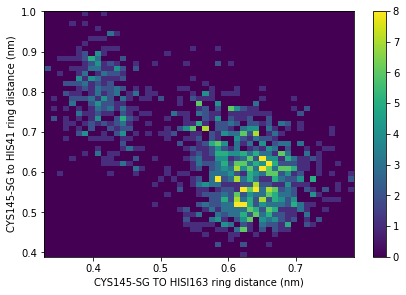

In [57]:
x = CYS145_HIS163_distances
y = CYS145_HIS41_distances


# Creating bins
x_min = np.min(x)
x_max = np.max(x)
  
y_min = np.min(y)
y_max = np.max(y)
  
x_bins = np.linspace(x_min, x_max)
y_bins = np.linspace(y_min, y_max)
  

# Creating plot
plt.hist2d(CYS145_HIS163_distances,CYS145_HIS41_distances, bins = [x_bins, y_bins])

#show plot
plt.tight_layout() 
plt.colorbar()
plt.xlabel('CYS145-SG TO HISI163 ring distance (nm)')
plt.ylabel('CYS145-SG to HIS41 ring distance (nm)')

Text(27.0, 0.5, 'GLU166-HIS163 ring distance (nm)')

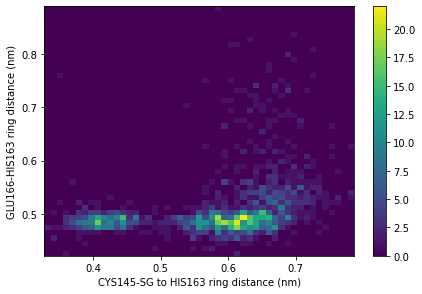

In [58]:
x = CYS145_HIS163_distances
y = GLU166_HIS163_distances


# Creating bins
x_min = np.min(x)
x_max = np.max(x)
  
y_min = np.min(y)
y_max = np.max(y)
  
x_bins = np.linspace(x_min, x_max)
y_bins = np.linspace(y_min, y_max)
  

# Creating plot
plt.hist2d(CYS145_HIS163_distances,GLU166_HIS163_distances, bins = [x_bins, y_bins])

#show plot
plt.tight_layout() 
plt.colorbar()
plt.xlabel('CYS145-SG to HIS163 ring distance (nm)')
plt.ylabel('GLU166-HIS163 ring distance (nm)')

Text(20.625, 0.5, 'TYR126-PHE140 ring distance (nm)')

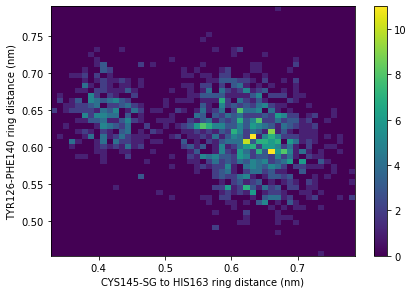

In [59]:
x = CYS145_HIS163_distances
y = TYR126_PHE140_distances


# Creating bins
x_min = np.min(x)
x_max = np.max(x)
  
y_min = np.min(y)
y_max = np.max(y)
  
x_bins = np.linspace(x_min, x_max)
y_bins = np.linspace(y_min, y_max)
  

# Creating plot
plt.hist2d(CYS145_HIS163_distances,TYR126_PHE140_distances, bins = [x_bins, y_bins])

#show plot
plt.tight_layout() 
plt.colorbar()
plt.xlabel('CYS145-SG to HIS163 ring distance (nm)')
plt.ylabel('TYR126-PHE140 ring distance (nm)')

Text(27.0, 0.5, 'GLU166-HIS163 ring distance (nm)')

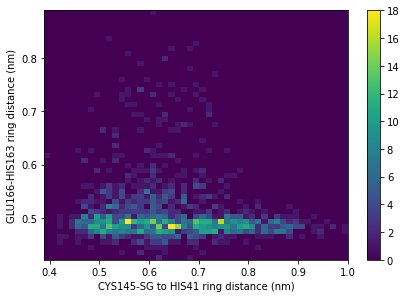

In [60]:
x = CYS145_HIS41_distances
y = GLU166_HIS163_distances


# Creating bins
x_min = np.min(x)
x_max = np.max(x)
  
y_min = np.min(y)
y_max = np.max(y)
  
x_bins = np.linspace(x_min, x_max)
y_bins = np.linspace(y_min, y_max)
  

# Creating plot
plt.hist2d(CYS145_HIS41_distances,GLU166_HIS163_distances, bins = [x_bins, y_bins])

#show plot
plt.tight_layout() 
plt.colorbar()
plt.xlabel('CYS145-SG to HIS41 ring distance (nm)')
plt.ylabel('GLU166-HIS163 ring distance (nm)')

Text(20.625, 0.5, 'TYR126-PHE140 ring distance (nm)')

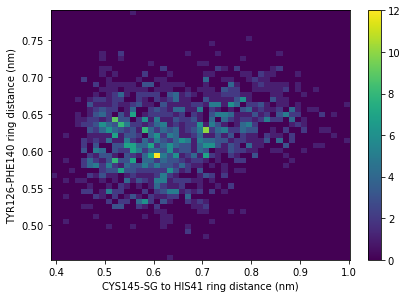

In [61]:
x = CYS145_HIS41_distances
y = TYR126_PHE140_distances


# Creating bins
x_min = np.min(x)
x_max = np.max(x)
  
y_min = np.min(y)
y_max = np.max(y)
  
x_bins = np.linspace(x_min, x_max)
y_bins = np.linspace(y_min, y_max)
  

# Creating plot
plt.hist2d(CYS145_HIS41_distances,TYR126_PHE140_distances, bins = [x_bins, y_bins])

#show plot
plt.tight_layout() 
plt.colorbar()
plt.xlabel('CYS145-SG to HIS41 ring distance (nm)')
plt.ylabel('TYR126-PHE140 ring distance (nm)')

Text(20.625, 0.5, 'TYR126-PHE140 ring distance (nm)')

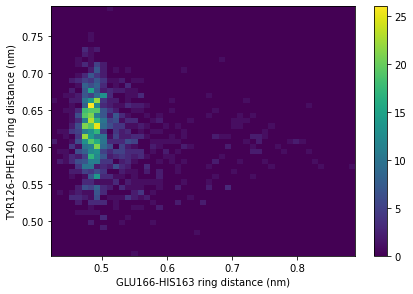

In [62]:
x = GLU166_HIS163_distances
y = TYR126_PHE140_distances


# Creating bins
x_min = np.min(x)
x_max = np.max(x)
  
y_min = np.min(y)
y_max = np.max(y)
  
x_bins = np.linspace(x_min, x_max,)
y_bins = np.linspace(y_min, y_max,)
  

# Creating plot
plt.hist2d(GLU166_HIS163_distances,TYR126_PHE140_distances, bins = [x_bins, y_bins])

#show plot
plt.tight_layout() 
plt.colorbar()
plt.xlabel('GLU166-HIS163 ring distance (nm)')
plt.ylabel('TYR126-PHE140 ring distance (nm)')

## Dihedral angles (phi and psi) of residues 140,141,142 in the oxyanion hole:


In [193]:
# calculating the diherdral angels of residue 140, 141, and 142 in the oxyanion hole
# Importing pyemma
## creating a phi and psi vs time graph for the residues
## creating histograms of these graphs?
## creating 2d histograms comparing these features?

import pyemma.coordinates
feat = pyemma.coordinates.featurizer('xtc_cluster.gro')


## calculating the backbone torsions of residue 140, 141, and 142
feat.add_backbone_torsions('residue 141 or residue 142 or residue 143', cossin = True)
angles = feat.transform(traj_983)
print(angles)

[[-0.9102401  -0.4140808  -0.8832495  ... -0.85230696 -0.97377324
   0.22752081]
 [-0.883562   -0.4683142  -0.7335609  ... -0.80801535 -0.91294676
   0.4080787 ]
 [-0.81985253 -0.57257473 -0.9143702  ... -0.88250256 -0.9030758
   0.42948112]
 ...
 [-0.9569205  -0.29034996 -0.8933293  ... -0.8529245   0.7986014
  -0.60186034]
 [-0.79120237 -0.61155444 -0.9395361  ... -0.7189337   0.85312724
  -0.52170295]
 [-0.7945751  -0.6071659  -0.8738365  ... -0.7910851   0.9052311
  -0.42491955]]


In [194]:
feat.describe
angles.shape

(1507, 12)

In [197]:
#creating a ramachandran plot 
feat_deg = pyemma.coordinates.featurizer('xtc_cluster.gro')

## calculating the backbone torsions of residue 140, 141, and 142
feat_deg.add_backbone_torsions('residue 141 or residue 142 or residue 143', cossin = False, deg = True)
angles_deg = feat_deg.transform(traj_983)
print(angles_deg)

[[-155.53854   152.03687   -71.92898   175.6916    -58.463478  166.84883 ]
 [-152.07507   137.18575  -104.65687   175.89354   -53.902473  155.91579 ]
 [-145.07002   156.11644  -105.57082   162.94157   -61.945736  154.56535 ]
 ...
 [-163.12108   153.29463  -126.571625  174.52133   -58.531193  -37.003246]
 [-142.298     159.97379  -141.19391   156.43086   -45.96651   -31.446548]
 [-142.61513   150.90758  -117.55107   163.9647    -52.28703   -25.145569]]


In [198]:
angles_deg.shape

(1507, 6)

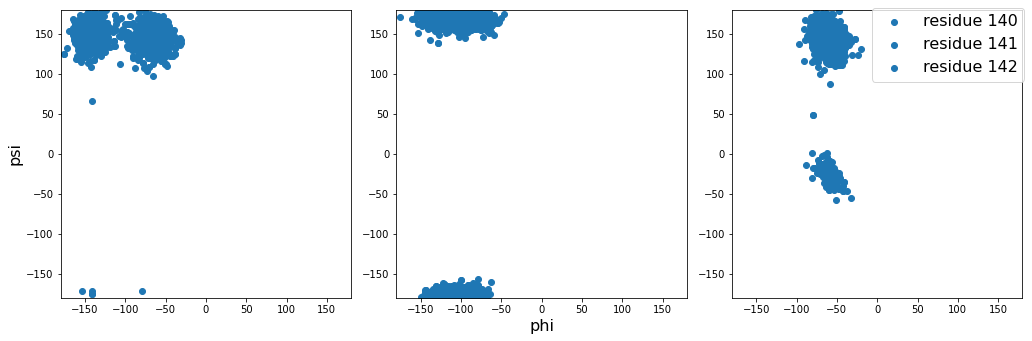

In [208]:
#ramachanandran plot of of the dihedral angles of residue 140,141,and 142
fig,ax = plt.subplots(1,3, figsize = [14.4, 4.8])
ax[0].scatter(angles_deg[:,0],angles_deg[:,1],label = 'residue 140')
ax[1].scatter(angles_deg[:,2],angles_deg[:,3],label = 'residue 141')
ax[2].scatter(angles_deg[:,4],angles_deg[:,5],label = 'residue 142')
ax[1].set_xlabel('phi',fontsize = 16)
ax[0].set_ylabel('psi',fontsize = 16)
for i in range(3):
    ax[i].set_xlim(-180,180)
    ax[i].set_ylim(-180,180)
fig.legend(fontsize = 16)
fig.tight_layout()

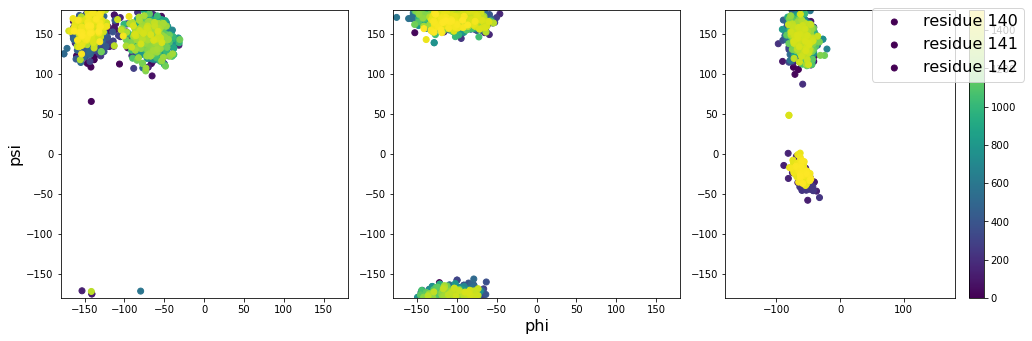

In [209]:
fig,ax = plt.subplots(1,3, figsize = [14.4, 4.8])
time = range(len(angles_deg))
ax[0].scatter(angles_deg[:,0],angles_deg[:,1],label = 'residue 140',c = time)
ax[1].scatter(angles_deg[:,2],angles_deg[:,3],label = 'residue 141',c = time)
cb = ax[2].scatter(angles_deg[:,4],angles_deg[:,5],label = 'residue 142',c =time)
ax[1].set_xlabel('phi',fontsize = 16)
ax[0].set_ylabel('psi',fontsize = 16)
for i in range(3):
    ax[i].set_xlim(-180,180)
    ax[i].set_ylim(-180,180)
fig.legend(fontsize = 16)
fig.colorbar(cb,ax = ax[2])
fig.tight_layout()

In [ ]:
# create a phi and psi vs time graph for the dihedral angles

